# TechLabs final project 
## (Problem 2 - Group 8)

__This notebook should be run in jupyter notebook, maybe it will fail in Google colab__

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Alejandro Echavarria, Juliana Bedoya, Luca Wulfert, Marco Stoever and Phillip Guske

---

# Data Preparation

### libraries

In [1]:
#------------- General purpose libraries -------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta


#------------- Machine learning libraries -------------

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from fbprophet import Prophet
import scipy.cluster.hierarchy as sch

#------------- Data visualization libraries -------------

import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Range1d, Span, Label
from bokeh.layouts import layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, VBox, HBox

import warnings
warnings.filterwarnings('ignore')

output_notebook()
from bokeh.tile_providers import get_provider, Vendors

Importing plotly failed. Interactive plots will not work.


Loading BokehJS ...

### Constants

In [2]:
#reading datasets
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
countries_csv_url = 'https://raw.githubusercontent.com/rechavar/pyCovid_TechLabsProj/master/countries.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [3]:
#converting the datasets in dataframes
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)
df_countries = pd.read_csv(countries_csv_url)

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [5]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,205,216,218,219,220,227,235,246,249,257
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,32,32,33,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,582,592,600,609,617,623,630,638,646,653
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4


In [6]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,996,1040,1075,1097,1128,1138,1209,1259,1303,1328
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,777,783,789,795,803,812,823,851,857,872
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,652,653,653,663,676,676,681,684,692,694
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,18,18,18,18,18,18,18,18,18


In [7]:
#Adding the dataframes into a dictionary 
all_dataframes = {'confirmed': df_confirmed,
                  'death': df_death,
                  'recovered': df_recovered,
                  'countries': df_countries}

### Data Cleaning

In [8]:
for key, df in all_dataframes.items():
  print('cleaning: {}'.format(key))

  if key == 'countries':
    continue

  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)

  #Grouping together countries originally split into multiple Provinces/States
  #(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
  df = df.groupby(by = df.index, axis = 0).sum()

  # Addition of a "global" row
  df.loc['Global'] = df.sum(axis=0)

  #transpose
  df=df.T
  df.rename_axis(index='Date', columns="Country",inplace=True)
  df.index = pd.to_datetime(df.index)

  #Naming the Date index:
  df.index.rename("Date", inplace= True)

  #Creating a datetime index:
  df.index = pd.to_datetime(df.index)
  
  #Save new dataFrame
  all_dataframes[key] = df

# Change country names in df_countries
old_names = [ 'Myanmar [Burma]', 'Cape Verde',  "C?te d'Ivoire", 'Czech Republic',
             'Congo [DRC]',  'Swaziland', 'Vatican City',  'South Korea', 'Macedonia [FYROM]',
              'Congo [Republic]',  'S?o Tom? and Pr?ncipe',  'United States',  'Gaza Strip','Sudan']

new_names = ['Burma', 'Cabo Verde', "Cote d'Ivoire", 'Czechia', 'Democratic Republic of the Congo',
              'Eswatini',  'Holy See',  'Korea, South',  'North Macedonia',  'Republic of the Congo',
             'Sao Tome and Principe', 'USA',  'West Bank and Gaza','South Sudan']

all_dataframes['countries'] = all_dataframes['countries'].replace(old_names, new_names)

cleaning: confirmed
cleaning: death
cleaning: recovered
cleaning: countries


In [9]:
all_dataframes['confirmed']
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,12456,1050,8857,763,71,25,13933,7774,7150,16591,...,803,3369,1245,327,434,9,256,1057,132,5691790
2020-05-28,13036,1076,8997,763,74,25,14702,8216,7165,16628,...,811,3444,1325,327,446,9,278,1057,149,5808946
2020-05-29,13659,1099,9134,764,81,25,15419,8676,7184,16655,...,816,3468,1370,328,446,9,283,1057,149,5924275


### New Dataframe: Active Cases

In [10]:
#Creating a new dataframe only with the active cases 
all_dataframes['active'] = all_dataframes['confirmed'] - all_dataframes['recovered'] - all_dataframes['death']

### Calculating Projections

In [11]:
#Create table with useful data
def create_country(country):
  country_confirmed=all_dataframes["confirmed"].loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in all_dataframes["confirmed"].columns}

In [12]:
#Create dictionary with projection tables
def create_projection(country):
  
  country_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes[country].index[-1], periods=21, freq='D'), 
                                   columns=["Total Cases", "New Cases", "R_7"]))
  country_prediction.drop(country_prediction.index[0], inplace=True)
  country_prediction.rename_axis(index='Date', columns=country,inplace=True)
  country_prediction.index=pd.to_datetime(country_prediction.index)
  country_dataframes[country]["Prediction"]=False
  country_prediction["Prediction"]=True

  country_combined=pd.concat([country_dataframes[country], country_prediction])

  R_slidervalue_country=country_dataframes[country]["R_7"][-1]
  
    
  for date in country_combined.index:
    if country_combined.loc[date, 'Prediction']:
      country_combined.loc[date, 'Total Cases']=R_slidervalue_country*(country_combined.shift(4).loc[date, 'Total Cases']-country_combined.shift(5).loc[date, 'Total Cases'])+country_combined.shift(1).loc[date, 'Total Cases']
         
  country_combined['New Cases']=country_combined['Total Cases']-country_combined.shift(1)['Total Cases']
    
  for date in country_combined.index:
    try:
      country_combined.loc[date, "R_7"]=(country_combined.loc[date, "Total Cases"]-country_combined.shift(7).loc[date, "Total Cases"])/(country_combined.shift(4).loc[date, "Total Cases"]-country_combined.shift(11).loc[date, "Total Cases"])
        
    except ZeroDivisionError:
      country_combined.loc[date, 'R_7']=None
  country_combined["Total Cases"]=country_combined["Total Cases"].astype('float64')
  country_combined["New Cases"]=country_combined["New Cases"].astype('float64')
  country_combined["R_7"]=country_combined["R_7"].astype('float64')
  return (country_combined)  
projection_dataframes = {country: create_projection(country) for country in all_dataframes["confirmed"].columns}

In [13]:
def add_more_projections(country):
  projection_dataframes[country]['Death Cases']=all_dataframes['death'][country]
  projection_dataframes[country]['Recovered Cases']=all_dataframes['recovered'][country]
  projection_dataframes[country]['Active Cases']=(projection_dataframes[country]['Total Cases']
                                                    -projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Recovered Cases'])
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))

  Recovered_Rate=projection_dataframes[country]['Recovered Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()
  Death_Rate=projection_dataframes[country]['Death Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()

  for date in projection_dataframes[country].index:
      if projection_dataframes[country].loc[date, 'Prediction']:
        projection_dataframes[country].loc[date, 'Recovered Cases']=(Recovered_Rate*projection_dataframes[country].shift(1).loc[date, 'Active Cases']
                                                                       +projection_dataframes[country].shift(1).loc[date, 'Recovered Cases'])
        projection_dataframes[country].loc[date, 'Death Cases']=(Death_Rate*projection_dataframes[country].shift(21).loc[date, 'New Cases']
                                                                   +projection_dataframes[country].shift(1).loc[date, 'Death Cases'])
        projection_dataframes[country].loc[date, 'Active Cases']=(projection_dataframes[country].loc[date, 'Total Cases']
                                                                    -projection_dataframes[country].loc[date, 'Recovered Cases']
                                                                    -projection_dataframes[country].loc[date, 'Death Cases'])
      
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))  
                                                                 
for country in all_dataframes["confirmed"].columns:
  add_more_projections(country)

### Machine Learning Approach

In [14]:
#Create countrywise dataframe for useful information
countrywise = pd.DataFrame()
countrywise['Country'] = all_dataframes['confirmed'].columns
countrywise = countrywise.set_index('Country')
countrywise['Confirmed'] = all_dataframes['confirmed'].iloc[-1,:]
countrywise['Death'] = all_dataframes['death'].iloc[-1,:]
countrywise['Recovered'] = all_dataframes['recovered'].iloc[-1,:]
countrywise['Active'] = all_dataframes['active'].iloc[-1,:]
countrywise.head()

,Confirmed,Death,Recovered,Active
Country,,,,
Afghanistan,15205,257,1328,13620
Albania,1137,33,872,232
Algeria,9394,653,5748,2993
Andorra,764,51,694,19
Angola,86,4,18,64


In [15]:
#Adding columns 
countrywise['Mortality'] = (countrywise['Death']/countrywise['Confirmed'])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise['Survival probability'] = 100 - countrywise['Mortality']

In [16]:
#Create datewise dataframe for useful information regarding dates
datewise = pd.DataFrame()
datewise['Date'] = all_dataframes['active'].index
datewise['Recovered'] = all_dataframes['recovered']['Global'].values
datewise['Confirmed'] = all_dataframes['confirmed']['Global'].values
datewise['Death'] = all_dataframes['death']['Global'].values
datewise['Active'] = all_dataframes['active']['Global'].values
datewise['Closed'] = datewise['Recovered'] + datewise['Death']
datewise = datewise.set_index('Date')

In [17]:
#Adding columns
datewise['Mortality'] = datewise['Death']/datewise['Confirmed']*100
datewise['Recovery'] = datewise['Recovered']/datewise['Confirmed']*100
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery
Date,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045
2020-01-23,30,654,18,606,48,2.752294,4.587156
2020-01-24,36,941,26,879,62,2.763018,3.825717
2020-01-25,39,1434,42,1353,81,2.928870,2.719665
2020-01-26,52,2118,56,2010,108,2.644004,2.455146
...,...,...,...,...,...,...,...
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085
2020-05-28,2415960,5808946,360308,3032678,2776268,6.202640,41.590333
2020-05-29,2493535,5924275,364867,3065873,2858402,6.158846,42.090129


In [18]:
#Changing to days since format 
datewise['Days since'] = datewise.index-datewise.index[0]
datewise['Days since'] = datewise["Days since"].dt.days
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery,Days since
Date,,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045,0
2020-01-23,30,654,18,606,48,2.752294,4.587156,1
2020-01-24,36,941,26,879,62,2.763018,3.825717,2
2020-01-25,39,1434,42,1353,81,2.928870,2.719665,3
2020-01-26,52,2118,56,2010,108,2.644004,2.455146,4
...,...,...,...,...,...,...,...,...
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085,126
2020-05-28,2415960,5808946,360308,3032678,2776268,6.202640,41.590333,127
2020-05-29,2493535,5924275,364867,3065873,2858402,6.158846,42.090129,128


#### Predictions using ML models

__Exploring some machine learning models__

In [19]:
#Training and validation data 
train = datewise.iloc[:int(datewise.shape[0] * 0.90)]
val = datewise.iloc[int(datewise.shape[0] * 0.90):]

In [20]:
#Function to plot the models
def plot_model(X, y, y_hat, title):

  plt.figure(figsize=(8,4))
  plt.plot(X, y, color = 'b', label = 'Confirmed cases')
  plt.plot(X, y_hat, color = 'r', label = 'Confirmed predicted cases')
  plt.legend(loc = 'best')
  plt.grid()
  plt.title(title)
  plt.show()

__All the following models sections use the same structure (initialization, training, getting rmse and plotting)__

Linear Model

In [21]:
lin_reg = LinearRegression(normalize= True)

In [22]:
lin_reg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
predictions = lin_reg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_lin = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error : ', rmse_lin)

Error :  1681672.3513485703


In [24]:
y_hat_lin = lin_reg.predict(np.asarray(datewise['Days since']).reshape(-1,1))

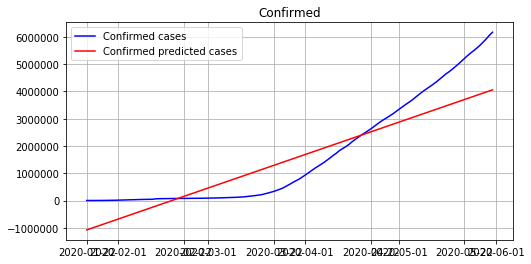

In [25]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_lin, 'Confirmed')

Polynomial regression

In [26]:
poly = PolynomialFeatures(degree = 10)

In [27]:
xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))
polyRegression = LinearRegression(normalize=True)
polyRegression.fit(xtrain_poly, train['Confirmed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [28]:
predictions = polyRegression.predict(xvalid_poly)
rmse_poly = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error: ', rmse_poly)

Error:  360935.9636859836


In [29]:
x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))

In [30]:
y_hat_poly = polyRegression.predict(x_poly)

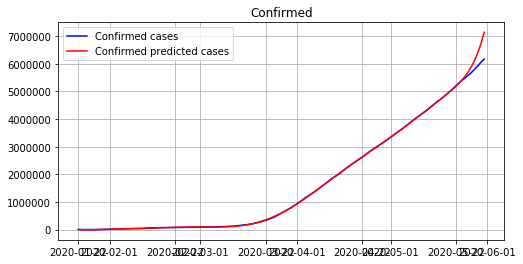

In [31]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_poly,'Confirmed')

Lasso model

In [32]:
lassoReg = LassoLars(alpha= 0.1)

In [33]:
lassoReg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [34]:
predictions = lassoReg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_lasso = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_lasso)

Error:  1681674.443905005


In [35]:
y_hat_lasso = lassoReg.predict(np.asarray(datewise['Days since']).reshape(-1,1))

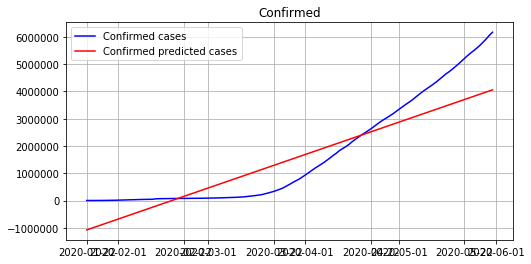

In [36]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_lasso,'Confirmed')

Support vector machine

In [37]:
svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)

In [38]:
svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_svm = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_svm)

Error:  939008.0769415144


In [39]:
y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))

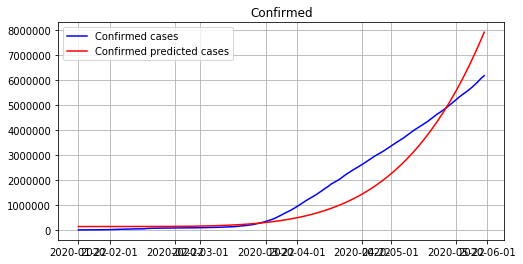

In [40]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_svm,'Confirmed')

Ensemble method : Random forest

In [41]:
forestReg =  RandomForestRegressor( random_state=0)

In [42]:
forestReg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [43]:
predictions = forestReg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_forest = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_forest)

Error:  887333.1862451683


In [44]:
y_hat_forest = forestReg.predict(np.asarray(datewise['Days since']).reshape(-1,1))

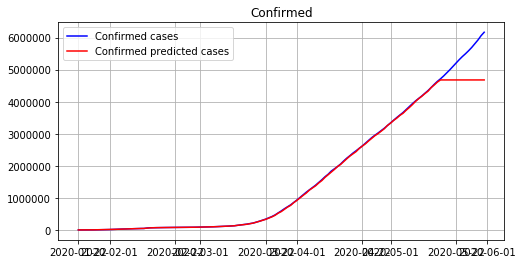

In [45]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_forest,'Confirmed')

Ensemble method : Ada Boost 

In [46]:
adam = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)

In [47]:
adam.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = adam.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_adam = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_adam)

Error:  959171.8352793746


In [48]:
y_hat_adam = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))

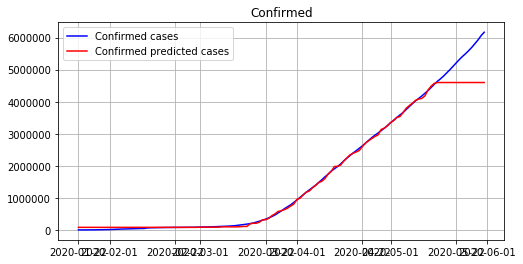

In [49]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_adam, 'Confirmed')

Neuronal Network

In [50]:
nn_reg = MLPRegressor(max_iter=1000,learning_rate='invscaling',
             learning_rate_init=10)

In [51]:
nn_reg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='invscaling',
             learning_rate_init=10, max_fun=15000, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
predictions = nn_reg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_nn = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_nn)

Error:  289843.9192599171


In [53]:
y_hat_nn = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))

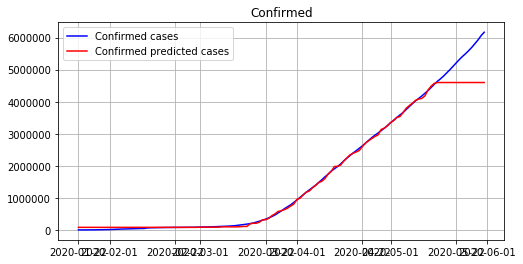

In [54]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_nn, 'Confirmed')

Facebook's prophet

In [55]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [56]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

confirmed_forecast=prophet_c.predict(forecast_c)

In [58]:
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -1.415550e+04 -4.845772e+04  2.152595e+04
1   2020-01-23 -7.081165e+03 -4.248233e+04  2.866753e+04
2   2020-01-24  1.107252e+03 -3.693904e+04  3.786414e+04
3   2020-01-25  6.339629e+03 -2.774620e+04  4.238533e+04
4   2020-01-26  7.943979e+03 -2.799142e+04  4.223409e+04
..         ...           ...           ...           ...
143 2020-06-13  7.287841e+06  7.153324e+06  7.447240e+06
144 2020-06-14  7.380178e+06  7.229629e+06  7.573170e+06
145 2020-06-15  7.464289e+06  7.301535e+06  7.669777e+06
146 2020-06-16  7.555088e+06  7.369331e+06  7.773024e+06
147 2020-06-17  7.648680e+06  7.439964e+06  7.893632e+06

[148 rows x 4 columns]


Figure(720x432)


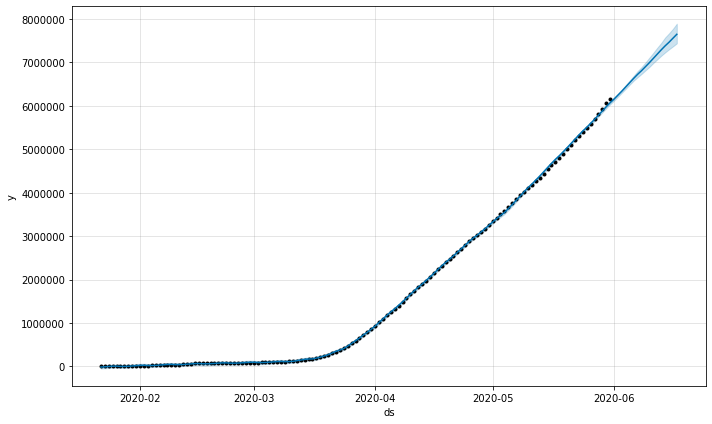

In [59]:
print(prophet_c.plot(confirmed_forecast))

In [60]:
prophet_rmse = np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0])))

In [61]:
print('Error: ', prophet_rmse)

Error:  18101.163691037305


__We chose 4 models to apply to each country and each case type.  <br> Those models are: Facebook's prophet, Polynomial regression, Ada boost and Support vector machine <br> The next four cells are the functions to apply those models__ 


In [62]:
def apply_fb_prophet(database, case, plot = True):
  prophet=Prophet(interval_width=0.95,weekly_seasonality=True)
  prophet_=pd.DataFrame(zip(list(database.index),list(database[case])),columns=['ds','y'])

  prophet.fit(prophet_)

  forecast=prophet.make_future_dataframe(periods=17)
  forecast_confirmed=forecast.copy()
  confirmed_forecast=prophet.predict(forecast)
  if plot:
    print(prophet.plot(confirmed_forecast))

  return prophet                 

In [63]:
def apply_poly(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  poly = PolynomialFeatures(degree = 8) 

  xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
  xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))

  polyRegression = LinearRegression(normalize=True)
  polyRegression.fit(xtrain_poly, train[case])

  predictions = polyRegression.predict(xvalid_poly)
  rmse_poly = np.sqrt(mean_squared_error(val[case],predictions))
  print('Error: ', rmse_poly)

  x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
  y_hat_poly = polyRegression.predict(x_poly) 
  if plot:
    plot_model(database.index, database[case], y_hat_poly, case)

  return polyRegression, poly 

In [64]:
def apply_svm(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
  svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  
  predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_svm = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_svm)

  y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_svm, case)
  return svm

In [65]:
def apply_ada(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]  

  ada = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
  ada.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  predictions = ada.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_adam = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_adam)
  y_hat_adam = ada.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_adam, case)
  return ada

Applying each model to death and recovered cases

FACEBOOK PROPHET

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


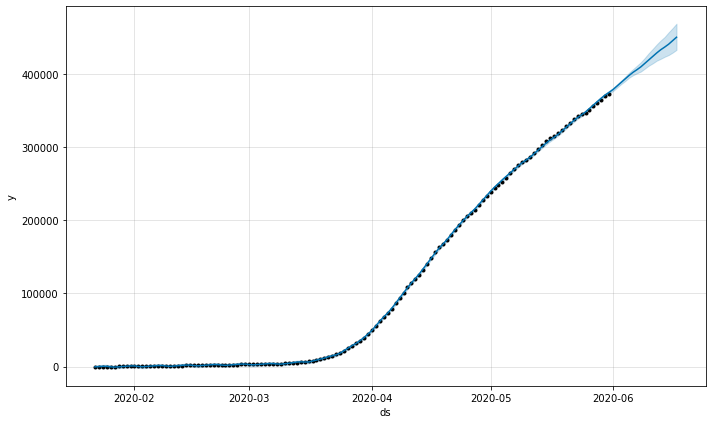

In [66]:
fb_death = apply_fb_prophet(datewise, 'Death')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


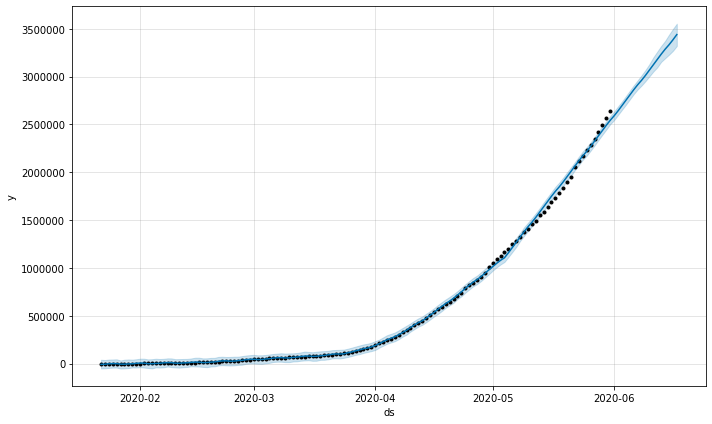

In [67]:
fb_recovered = apply_fb_prophet(datewise, 'Recovered')

POLYNOMIAL REGRESSOR

Error:  6247.084896848578


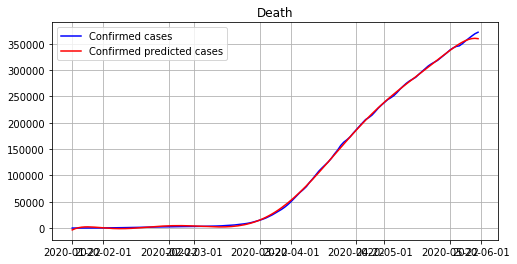

In [68]:
poly_death = apply_poly(datewise, 'Death')

Error:  136514.68843439143


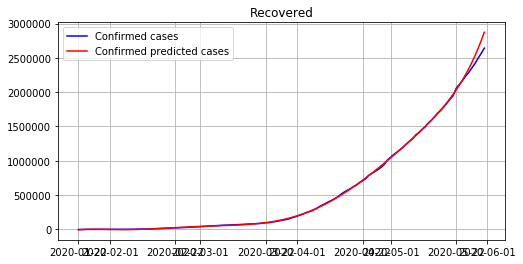

In [69]:
poly_recovered = apply_poly(datewise, 'Recovered')

SVM

Error:  200225.9745710003


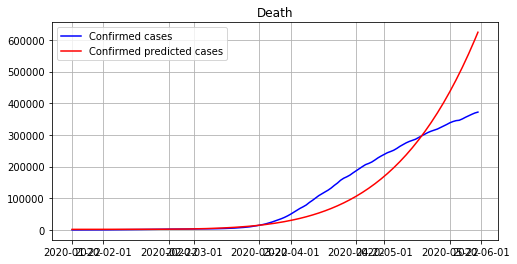

In [70]:
svm_death = apply_svm(datewise, 'Death')

Error:  227164.38048481816


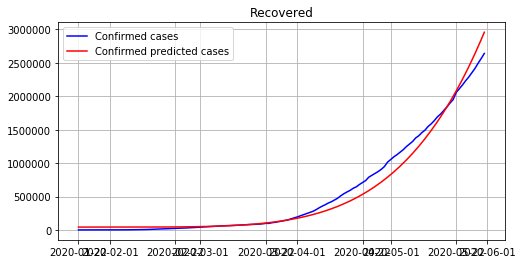

In [71]:
svm_recovered = apply_svm(datewise,'Recovered')

Ada boost

Error:  23100.1279619214


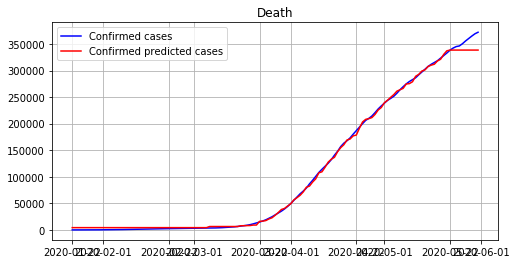

In [72]:
ada_death = apply_ada(datewise,'Death')

Error:  330557.7233699112


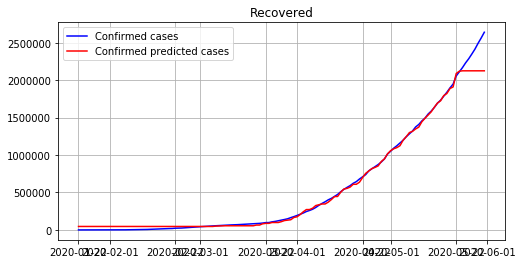

In [73]:
ada_recovered = apply_ada(datewise,'Recovered')

In [74]:
#Function to create datewise for one country 
def make_datewise(country):
  datewise = pd.DataFrame()
  datewise['Date'] = all_dataframes['active'].index
  datewise['Recovered'] = all_dataframes['recovered'][country].values
  datewise['Confirmed'] = all_dataframes['confirmed'][country].values
  datewise['Death'] = all_dataframes['death'][country].values
  datewise['Active'] = all_dataframes['active'][country].values
  datewise['Closed'] = datewise['Recovered'] + datewise['Death']
  datewise = datewise.set_index('Date')
  datewise['Days since'] = datewise.index-datewise.index[0]
  datewise['Days since'] = datewise["Days since"].dt.days
  return datewise

In [75]:
#For loop to create the datewise for each country
all_datewise = {}
for country in countrywise.index:
  print('country: ', country)
  all_datewise[country] = make_datewise(country)

country:  Afghanistan
country:  Albania
country:  Algeria
country:  Andorra
country:  Angola
country:  Antigua and Barbuda
country:  Argentina
country:  Armenia
country:  Australia
country:  Austria
country:  Azerbaijan
country:  Bahamas
country:  Bahrain
country:  Bangladesh
country:  Barbados
country:  Belarus
country:  Belgium
country:  Belize
country:  Benin
country:  Bhutan
country:  Bolivia
country:  Bosnia and Herzegovina
country:  Botswana
country:  Brazil
country:  Brunei
country:  Bulgaria
country:  Burkina Faso
country:  Burma
country:  Burundi
country:  Cabo Verde
country:  Cambodia
country:  Cameroon
country:  Canada
country:  Central African Republic
country:  Chad
country:  Chile
country:  China
country:  Colombia
country:  Comoros
country:  Costa Rica
country:  Cote d'Ivoire
country:  Croatia
country:  Cuba
country:  Cyprus
country:  Czechia
country:  Democratic Republic of the Congo
country:  Denmark
country:  Diamond Princess
country:  Djibouti
country:  Dominica
coun

In [76]:
#Function to get the predictions 
def get_prediction(country: str, case: str, model : str, dataframe_dict, days = 21):
    print('Calculating {} cases for {} using the model {}'.format(case, country, model))
    df = dataframe_dict[country]
    if model == 'poly':
        modelo, featuresTransform = apply_poly(df,case, plot = False)
    if model == 'svm':
        modelo = apply_svm(df,case, plot = False)
    if model == 'facebook':
        modelo = apply_fb_prophet(df,case, plot = False)
    if model == 'ada':
        modelo = apply_ada(df,case, plot = False)

    if model == 'facebook':
      forecast=modelo.make_future_dataframe(periods = days)
      forecast_confirmed=forecast.copy()
      y_hat = modelo.predict(forecast)
      y_hat = y_hat.iloc[-15:,-1]

    elif model == 'poly':
      x_hat_list = range(df['Days since'].max() ,df['Days since'].max() + days)
      x_hat = featuresTransform.fit_transform(np.asarray(x_hat_list).reshape(-1,1))
      y_hat = modelo.predict(x_hat)
      
    else:
      x_hat_list = range(df['Days since'].max() ,df['Days since'].max() + days)    
      x_hat = np.asarray(x_hat_list).reshape(-1,1)
      print(x_hat)
      y_hat = modelo.predict(x_hat)


    return y_hat

In [77]:
#Applying function
prediction = get_prediction('Germany', 'Confirmed', 'facebook', all_datewise)
prediction

Calculating Confirmed cases for Germany using the model facebook


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


137    188937.220184
138    189392.238182
139    189857.908548
140    190662.128258
141    191508.260001
142    192531.692794
143    192994.586406
144    193315.835206
145    193770.853203
146    194236.523570
147    195040.743280
148    195886.875023
149    196910.307816
150    197373.201428
151    197694.450228
Name: yhat, dtype: float64

# Interactive Data Visualization <br> (Chapters 1 and 2)

## Chapter 1: World Map


In [78]:
#rename df_countries columns for merge
all_dataframes['countries'].rename(columns= {'country': 'shortcut', 'name': 'Country'}, inplace = True)
all_dataframes['countries'].head()

,shortcut,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [79]:

# create slider
dates = list(pd.date_range(all_dataframes["confirmed"].index.min(), all_dataframes["confirmed"].index.max(), freq='D'))
options = [(i.strftime('%Y-%m-%d'), i) for i in dates]
index = len(dates)-1
date_slider = widgets.SelectionSlider(
    options = options,
    index = index,
    description = 'Choose the Date:',
    orientation = 'horizontal',
    layout={'width': '900px'}, 
    style = {'description_width': 'initial'}
)
   
#function to plot the map
def show_world_map(date_shown, Casetype = ["Active", "Death", "Confirmed", "Recovered"]):

    all_dataframes['map'] = pd.DataFrame()
    all_dataframes['map']['Active'] = all_dataframes['active'].loc[date_shown,:]
    all_dataframes['map']['Death'] = all_dataframes['death'].loc[date_shown,:]
    all_dataframes['map']['Confirmed'] = all_dataframes['confirmed'].loc[date_shown,:]
    all_dataframes['map']['Recovered'] = all_dataframes['recovered'].loc[date_shown,:]
    all_dataframes['map'] = pd.merge(all_dataframes['map'],all_dataframes['countries'],on='Country')

    #Circles sizes for each country:
    all_dataframes['map']['sizeOfCircles'] = all_dataframes['map'][Casetype]/all_dataframes['map'][Casetype].max()*200
    all_dataframes['map'].loc[all_dataframes['map']['sizeOfCircles'] < 6, 'sizeOfCircles'] = 6

    #get the coordinates from https://carto.com/
    tile_provider = get_provider(Vendors.CARTODBPOSITRON)

    p = figure(plot_width=900, plot_height=425, title="Interactive Covid-19 World Map",
               x_range=(-2000000, 6000000),
               y_range=(-1000000, 7000000),
               x_axis_type="mercator",
               y_axis_type="mercator",
               x_axis_label='Longitude',
               y_axis_label='Latitude')
    p.title.text_font_size = "35px"
    p.title.align = "center"
    p.add_tile(tile_provider)

    #Transform LON/LAT coordinates in web mercator format
    #function to transform
    def wgs84_to_web_mercator(df, lon="LON", lat="LAT"):

          k = 6378137
          df["x"] = df[lon] * (k * np.pi/180.0)
          df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k

          return df

    #rename columns for the function
    all_dataframes['map'].rename(columns={"longitude": "LON", "latitude": "LAT"}, inplace=True)

    #use the function 
    wgs84_to_web_mercator(all_dataframes['map'])

    #make it interactive

    all_dataframes['map'].drop(columns=['LAT', 'LON'])

    #convert the dataframe into a ColumnDataSource so that bokeh can work with it
    psource = ColumnDataSource(all_dataframes['map'])
    
    #changing colors for every type of case
    if Casetype == "Active":
        linecolor = "blue"
        fillcolor = "blue"
        
    if Casetype == "Confirmed":
        linecolor = "black" 
        fillcolor = "black"
        
    if Casetype == "Recovered":
        linecolor = "green"   
        fillcolor = "green"

    if Casetype == "Death":
        linecolor = "red" 
        fillcolor = "red"
    
    #create map
    p.circle('x', 'y', source=psource, size='sizeOfCircles',
             line_color=linecolor, 
             fill_color=fillcolor,
             fill_alpha=0.05,
             legend_label="Relative Amount of Cases on that Day ")

    #create hover tool
    my_hover = HoverTool()
    
    if Casetype == "Active":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Active Cases', '@Active{0,0}')]
    if Casetype == "Confirmed":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Confirmed Cases', '@Confirmed{0,0}')]
    if Casetype == "Recovered":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Recovered Cases', '@Recovered{0,0}')]
    if Casetype == "Death":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Death Cases', '@Death{0,0}')]
    p.add_tools(my_hover)


    show(p)
    
interact_manual(show_world_map, date_shown = date_slider);

interactive(children=(SelectionSlider(description='Choose the Date:', index=130, layout=Layout(width='900px'),…

## Chapter 2: Interactive Bokeh Plot

In [80]:
# line plot - multiple lines

############################################################################
#Widgets:

#Dropdown Widget:
drop_down = widgets.Dropdown(options=all_dataframes['confirmed'].columns,
                                value="Germany",
                                description='Country:',
                                disabled=False)

#Checkbox Widget:
checkbox_confirmed = widgets.Checkbox(
    value=True,
    description='Show Confirmed Cases',
    disabled=False,
    indent=False
)
checkbox_active = widgets.Checkbox(
    value=False,
    description='Show Active Cases',
    disabled=False,
    indent=False
)

checkbox_recovered = widgets.Checkbox(
    value=False,
    description='Show Recovered Cases',
    disabled=False,
    indent=False
)

checkbox_death = widgets.Checkbox(
    value=False,
    description='Show Death Cases',
    disabled=False,
    indent=False
)

checkbox_repr_projection = widgets.Checkbox(
    value=True,
    description='Show Reproduction Rate Projection',
    disabled=True,
    indent=False
)

checkbox_prophet = widgets.Checkbox(
    value=False,
    description='Show Facebook Prophet Projection',
    disabled=True,
    indent=False
)

checkbox_poly_regr = widgets.Checkbox(
    value=False,
    description='Show Polynomial Regression Projection',
    disabled=True,
    indent=False
)

checkbox_svm = widgets.Checkbox(
    value=False,
    description='Show Support Vector Machine Projection',
    disabled=True,
    indent=False
)

checkbox_ada_regr = widgets.Checkbox(
    value=False,
    description='Show AdaBoost Projection',
    disabled=True,
    indent=False, visibility='hidden'
)

#Date picker widget:
startdatepicker = widgets.DatePicker(
    description='Pick a Startdate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = all_dataframes["confirmed"].index[0]
)

enddatepicker = widgets.DatePicker(
    description='Pick an Enddate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = projection_dataframes["Germany"].index[-1]
)

#Button to activate projections 
toggle_projections = widgets.ToggleButton(
    value=False,
    description='Show Projections',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Do you want to include projections in the plot?',
    icon='check' # (FontAwesome names without the `fa-` prefix) #check
)

############################################################################

############################################################################
#plotting function
def plot_country(country, startdate, enddate, 
                 confirmed, active, recovered, death,
                 #projection_confirmed = True
                 include_projection,
                 reproduction_projection, prophet_projection, poly_projection, svm_projection, adaboost_projection):

  #plot setup: 
  multi_line_plot = figure(plot_width=900, plot_height=425, title='Covid-19 Cases in {}'.format(country), 
                           x_axis_label='Date', y_axis_label='No. of Cases in {}'.format(country),
                           x_axis_type='datetime', y_axis_type = "linear")
  multi_line_plot.title.text_font_size = "35px"
  multi_line_plot.title.align = "center"

  multi_line_plot.left[0].formatter.use_scientific = False
    
  #data lines:
  if confirmed == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['confirmed'],
                       color='black', line_width=2, line_dash = "dashed", legend = "Confirmed Cases")
  if active == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['active'],
                       color='blue', line_width=2, legend = "Active Cases")
  if recovered == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['recovered'],
                       color='green', line_width=2, legend = "Recovered Cases")
  if death == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['death'],
                       color='red', line_width=2, legend = "Death Cases")
        
  #projection lines:
  if include_projection == True:
    checkbox_repr_projection.disabled = False
    checkbox_prophet.disabled = False
    checkbox_poly_regr.disabled = False
    checkbox_svm.disabled = False
    checkbox_ada_regr.disabled = False
    
    if confirmed == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Total Cases"], 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
            
        if prophet_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
            
        if poly_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
        if svm_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
            
        
    if active == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Active Cases"], 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
        if prophet_projection == True:
            prediction = get_prediction(country, 'Active', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
        if poly_projection == True:
            prediction = get_prediction(country, 'Active', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)  
        if svm_projection == True:
            prediction = get_prediction(country, 'Active', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Active', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)            
            
            
    if recovered == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Recovered Cases"], 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
        if prophet_projection == True:
            prediction = get_prediction(country, 'Recovered', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
        if poly_projection == True:
            prediction = get_prediction(country, 'Recovered', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
        if svm_projection == True:
            prediction = get_prediction(country, 'Recovered', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2) 
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Recovered', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
            
            
    if death == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Death Cases"], 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if prophet_projection == True:
            prediction = get_prediction(country, 'Death', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if poly_projection == True:
            prediction = get_prediction(country, 'Death', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if svm_projection == True:
            prediction = get_prediction(country, 'Death', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Death', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
            
            
            
  #disable projection checkboxes when include_projection is unchecked:          
  if include_projection == False:
    checkbox_repr_projection.disabled = True
    checkbox_prophet.disabled = True
    checkbox_poly_regr.disabled = True
    checkbox_svm.disabled = True
    checkbox_ada_regr.disabled = True 
    
  multi_line_plot.x_range = Range1d(startdate, enddate)
  
  #add vertical line  
  projection_beginning = all_dataframes['confirmed'].index.max()
  beginning_of_projection = Span(location=projection_beginning,
                            dimension='height', line_color='orange',
                            line_dash='dashed', line_width=1, 
                            name = "Beginning of Projection") 
  multi_line_plot.add_layout(beginning_of_projection)

    
  # add hover tool
  hover = HoverTool()
  hover.tooltips = [('Date','@Date{%F}'),('No. of Cases','@{}'.format(country))]
  hover.formatters = {'Date': 'datetime'} 
  multi_line_plot.add_tools(hover)

  #format legend
  multi_line_plot.legend.location = "top_left"
  multi_line_plot.legend.orientation = "vertical"
  multi_line_plot.legend.background_fill_alpha = 0.35

  show(multi_line_plot)
############################################################################

############################################################################
#Interact function:
interact(plot_country, country = drop_down, startdate = startdatepicker, enddate = enddatepicker,
         confirmed = checkbox_confirmed, active = checkbox_active, 
         recovered = checkbox_recovered, death = checkbox_death,
         include_projection = toggle_projections,
         reproduction_projection = checkbox_repr_projection, prophet_projection = checkbox_prophet,
         poly_projection = checkbox_poly_regr, svm_projection = checkbox_svm, 
         adaboost_projection = checkbox_ada_regr);
############################################################################


interactive(children=(Dropdown(description='Country:', index=65, options=('Afghanistan', 'Albania', 'Algeria',…

# Chapter 3: Clustering 


## Clusters based on the reproduction rate

In [81]:
#Adding last r_7 values to countrywise dataframe
r_7 = []
for key in country_dataframes.keys():
  r_7.append(country_dataframes[key].iloc[-1,-2])

In [82]:
countrywise['R_7'] = r_7

In [83]:
#Standardize the distance between values because clusters are based on distances
x_7 = countrywise[['R_7','Mortality']][countrywise['Confirmed']>1000]
std = StandardScaler()
x_7 = std.fit_transform(x_7)

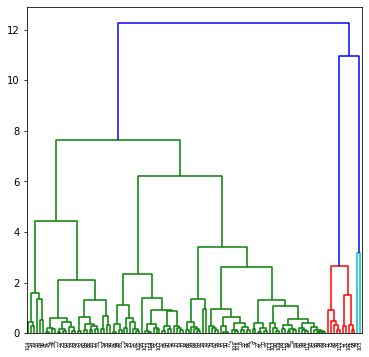

In [84]:
#Plotting dendogram
plt.figure(figsize=(6,6))
dendogram=sch.dendrogram(sch.linkage(x_7, method  = "ward"))

In [85]:
#Training clusters
clusters = KMeans(n_clusters=3, random_state=6)
clusters.fit(x_7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [86]:
#Adding clusters to countrywise
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'R_7']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['R_7 Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival probability,R_7,R_7 Clusters
Country,,,,,,,,,
Afghanistan,15205,257,1328,13620,1.690233,8.733969,98.309767,1.072373,0
Albania,1137,33,872,232,2.902375,76.693052,97.097625,1.616279,2
Algeria,9394,653,5748,2993,6.951245,61.187992,93.048755,0.827376,2
Andorra,764,51,694,19,6.675393,90.837696,93.324607,2.000000,4
Angola,86,4,18,64,4.651163,20.930233,95.348837,0.894737,4
...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,0.000000,4
Yemen,323,80,14,229,24.767802,4.334365,75.232198,1.402778,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,0.608889,0


In [87]:
#Group cluster in a new dataframe to display them 
summary = pd.concat([countrywise[countrywise['R_7 Clusters'] == 0].head(10),countrywise[countrywise['R_7 Clusters'] == 1].head(10),countrywise[countrywise['R_7 Clusters'] == 2].head(10),countrywise[countrywise['R_7 Clusters'] == 4].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival probability,R_7,R_7 Clusters
Country,,,,,,,,,
Afghanistan,15205.00,257.00,1328.00,13620.00,1.69,8.73,98.31,1.07,0.00
Armenia,9282.00,131.00,3386.00,5765.00,1.41,36.48,98.59,1.05,0.00
Australia,7202.00,103.00,6618.00,481.00,1.43,91.89,98.57,1.28,0.00
Azerbaijan,5494.00,63.00,3428.00,2003.00,1.15,62.40,98.85,1.46,0.00
Bahrain,11398.00,19.00,6673.00,4706.00,0.17,58.55,99.83,1.25,0.00
Bangladesh,47153.00,650.00,9781.00,36722.00,1.38,20.74,98.62,1.17,0.00
Belarus,42556.00,235.00,18514.00,23807.00,0.55,43.51,99.45,0.97,0.00
Central African Republic,1011.00,2.00,23.00,986.00,0.20,2.27,99.80,1.43,0.00
Chile,99688.00,1054.00,42727.00,55907.00,1.06,42.86,98.94,1.07,0.00


In [88]:
print('Average mortality of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['Mortality'].mean())
print('Average R_7 of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['R_7'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['Mortality'].mean())
print('Average R_7 of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['R_7'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['Mortality'].mean())
print('Average R_7 of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['R_7'].mean())

Average mortality of cluster 0: 1.0625639193823075
Average R_7 of cluster 0: 1.2603021656663405
Average mortality of cluster 1: 2.087228021072048
Average R_7 of cluster 1: 0.4994228451175518
Average mortality of cluster 2: 5.89088809584762
Average R_7 of cluster 2: 1.1569693753349035


In [89]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['R_7 Clusters'] == 0].index)

Countries that belong to cluster 0:  Index(['Afghanistan', 'Armenia', 'Australia', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Central African Republic', 'Chile',
       'Costa Rica', 'Cote d'Ivoire', 'Democratic Republic of the Congo',
       'Djibouti', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iceland',
       'Israel', 'Kazakhstan', 'Korea, South', 'Kuwait', 'Kyrgyzstan',
       'Malaysia', 'Maldives', 'Nepal', 'Oman', 'Pakistan', 'Panama', 'Qatar',
       'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'South Africa',
       'Sri Lanka', 'Tajikistan', 'Thailand', 'United Arab Emirates',
       'Uzbekistan', 'Venezuela', 'Zambia'],
      dtype='object', name='Country')


In [90]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['R_7 Clusters'] == 1].index)

Countries that belong to cluster 1:  Index(['Latvia', 'Lebanon', 'Morocco', 'New Zealand', 'Serbia', 'Slovakia'], dtype='object', name='Country')


In [91]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['R_7 Clusters'] == 2].index)

Countries that belong to cluster 2:  Index(['Albania', 'Algeria', 'Argentina', 'Austria', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon', 'Canada',
       'China', 'Colombia', 'Croatia', 'Cuba', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy', 'Japan', 'Kenya',
       'Kosovo', 'Lithuania', 'Luxembourg', 'Mali', 'Mexico', 'Moldova',
       'Netherlands', 'Nigeria', 'North Macedonia', 'Norway', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Somalia',
       'Spain', 'Sudan', 'Sweden', 'Switzerland', 'Tunisia', 'Turkey', 'USA',
       'Ukraine', 'United Kingdom', 'Global'],
      dtype='object', name='Country')


__SUMMARY__

In [92]:
#Summary of clusters
clus_r7_mortality ={}
cardinal_positio = {
    '0' : 'highest reproduction',
    '1' : 'middle reproduction',
    '2' : 'lowest repoduction'
}

clus_r7_mortality['cluster_0'] = countrywise[countrywise['R_7 Clusters'] == 0]['Mortality'].mean()
clus_r7_mortality['cluster_1'] = countrywise[countrywise['R_7 Clusters'] == 1]['Mortality'].mean()
clus_r7_mortality['cluster_2'] = countrywise[countrywise['R_7 Clusters'] == 2]['Mortality'].mean()

clus_r7_r_7 = {}
clus_r7_r_7['cluster_0'] = countrywise[countrywise['R_7 Clusters'] == 0]['R_7'].mean()
clus_r7_r_7['cluster_1'] = countrywise[countrywise['R_7 Clusters'] == 1]['R_7'].mean()
clus_r7_r_7['cluster_2'] = countrywise[countrywise['R_7 Clusters'] == 2]['R_7'].mean()

sort_mortality = sorted(clus_r7_mortality.items(), key=lambda x: x[1], reverse=True)

sort_r7 = sorted(clus_r7_r_7.items(), key=lambda x: x[1], reverse=True)

positions_r7 = [x[0] for x in sort_r7]
positions_mortality = [x[0] for x in sort_mortality]


print("\033[1m" + 'The order below corresponds to the position in a descendent order: '+ "\033[0m")
print('----------------------------------------------------------------------------------------------------')
print("The cluster with the highest Mortality value is {} and it has the {} rate".format(positions_mortality[0], cardinal_positio[str(positions_r7.index(positions_mortality[0]))]))

print("The cluster with the middle Mortality value is {} and it has the {} rate".format(positions_mortality[1], cardinal_positio[str(positions_r7.index(positions_mortality[1]))]))

print("The cluster with the Lowest Mortality value is {} and it has the {} rate".format(positions_mortality[2], cardinal_positio[str(positions_r7.index(positions_mortality[2]))]))

The orden below correspond to the position in a descendent order: 
----------------------------------------------------------------------------------------------------
The cluster with the highest Mortality value is cluster_2 and it has the middle reproduction rate
The cluster with the middle Mortality value is cluster_1 and it has the lowest repoduction rate
The cluster with the Lowest Mortality value is cluster_0 and it has the highest reproduction rate


## Clusters based on the mortality rate and the recovery rate

__This cluster has the same structure explained before in the first cluster that we created__


In [93]:
x_r = []
x_r = countrywise[['Mortality', 'Recovery']][countrywise['Confirmed']>1000]
std = StandardScaler() #K-means is a distance based algorithm
  
x_r = std.fit_transform(x_r)

Using dendogram to know the possible number of clusters

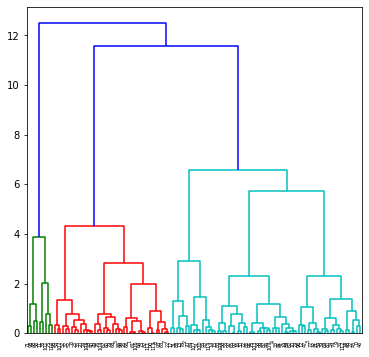

In [94]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(6,6))
dendogram_r=sch.dendrogram(sch.linkage(x_r, method  = "ward"))

It seams like that we can work with 3 clusters

In [95]:
clusters = KMeans(n_clusters=3, random_state=6)
clusters.fit(x_r)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [96]:
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'Recovery']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival probability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,15205,257,1328,13620,1.690233,8.733969,98.309767,1.072373,0,0
Albania,1137,33,872,232,2.902375,76.693052,97.097625,1.616279,2,0
Algeria,9394,653,5748,2993,6.951245,61.187992,93.048755,0.827376,2,0
Andorra,764,51,694,19,6.675393,90.837696,93.324607,2.000000,4,4
Angola,86,4,18,64,4.651163,20.930233,95.348837,0.894737,4,4
...,...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,0.000000,4,4
Yemen,323,80,14,229,24.767802,4.334365,75.232198,1.402778,4,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,0.608889,0,0


In [97]:
summary = pd.concat([countrywise[countrywise['Clusters'] == 0].head(10),countrywise[countrywise['Clusters'] == 1].head(10),countrywise[countrywise['Clusters'] == 2].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival probability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,15205.00,257.00,1328.00,13620.00,1.69,8.73,98.31,1.07,0.00,0.00
Albania,1137.00,33.00,872.00,232.00,2.90,76.69,97.10,1.62,2.00,0.00
Algeria,9394.00,653.00,5748.00,2993.00,6.95,61.19,93.05,0.83,2.00,0.00
Argentina,16851.00,539.00,5336.00,10976.00,3.20,31.67,96.80,1.03,2.00,0.00
Armenia,9282.00,131.00,3386.00,5765.00,1.41,36.48,98.59,1.05,0.00,0.00
Australia,7202.00,103.00,6618.00,481.00,1.43,91.89,98.57,1.28,0.00,0.00
Austria,16731.00,668.00,15593.00,470.00,3.99,93.20,96.01,0.96,2.00,0.00
Azerbaijan,5494.00,63.00,3428.00,2003.00,1.15,62.40,98.85,1.46,0.00,0.00
Bahrain,11398.00,19.00,6673.00,4706.00,0.17,58.55,99.83,1.25,0.00,0.00


In [98]:
print('Average mortality of cluster 0:', countrywise[countrywise['Clusters']==0]['Mortality'].mean())
print('Average recovery of cluster 0:', countrywise[countrywise['Clusters']==0]['Recovery'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['Clusters']==1]['Mortality'].mean())
print('Average recovery of cluster 1:', countrywise[countrywise['Clusters']==1]['Recovery'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['Clusters']==2]['Mortality'].mean())
print('Average recovery of cluster 2:', countrywise[countrywise['Clusters']==2]['Recovery'].mean())

Average mortality of cluster 0: 3.3720724226861347
Average recovery of cluster 0: 55.24925950274422
Average mortality of cluster 1: nan
Average recovery of cluster 1: nan
Average mortality of cluster 2: 11.354193556895662
Average recovery of cluster 2: 8.479251108316067


In [99]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['Clusters'] == 0].index)

Countries that belong to cluster 0:  Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Thailand', 'Tunisia', 'Turkey', 'USA', 'Ukraine',
       'United Arab Emirates', 'Uzbekistan', 'Venezuela', 'Zambia', 'Global'],
      dtype='object', name='Country', length=110)


In [100]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['Clusters'] == 1].index)

Countries that belong to cluster 1:  Index([], dtype='object', name='Country')


In [101]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['Clusters'] == 2].index)

Countries that belong to cluster 2:  Index(['Belgium', 'Haiti', 'Netherlands', 'Sweden', 'United Kingdom'], dtype='object', name='Country')


In [102]:
clus_mortality ={}
cardinal_positio = {
    '0' : 'the highest recovery',
    '1' : 'a good recovery',
    '2' : 'the lowest recovery'
}

clus_mortality['cluster_0'] = countrywise[countrywise['Clusters'] == 0]['Mortality'].mean()
clus_mortality['cluster_1'] = countrywise[countrywise['Clusters'] == 1]['Mortality'].mean()
clus_mortality['cluster_2'] = countrywise[countrywise['Clusters'] == 2]['Mortality'].mean()

clus_recovery = {}
clus_recovery['cluster_0'] = countrywise[countrywise['Clusters'] == 0]['Recovery'].mean()
clus_recovery['cluster_1'] = countrywise[countrywise['Clusters'] == 1]['Recovery'].mean()
clus_recovery['cluster_2'] = countrywise[countrywise['Clusters'] == 2]['Recovery'].mean()

sort_mortality = sorted(clus_mortality.items(), key=lambda x: x[1], reverse=True)

sort_recovery = sorted(clus_recovery.items(), key=lambda x: x[1], reverse=True)

positions_recovery = [x[0] for x in sort_recovery]
positions_mortality = [x[0] for x in sort_mortality]


print( "\033[1m" + 'The order below corresponds to the position in a descendent order: '+ "\033[0m")
print('----------------------------------------------------------------------------------------------------')
print("The cluster with the highest Mortality value is {} and it has {} rate".format(positions_mortality[0], cardinal_positio[str(positions_recovery.index(positions_mortality[0]))]))

print("The cluster with the middle Mortality value is {} and it has {} rate".format(positions_mortality[1], cardinal_positio[str(positions_recovery.index(positions_mortality[1]))]))

print("The cluster with the Lowest Mortality value is {} and it has {} rate".format(positions_mortality[2], cardinal_positio[str(positions_recovery.index(positions_mortality[2]))]))

The orden below correspond to the position in a descendent order: 
----------------------------------------------------------------------------------------------------
The cluster with the highest Mortality value is cluster_0 and it has the highest recovery rate
The cluster with the middle Mortality value is cluster_1 and it has a good recovery rate
The cluster with the Lowest Mortality value is cluster_2 and it has the lowest recovery rate
